
## **Logistic Regression with Classification**

### **1. Exploratory Data Analysis (EDA)**

* **Description:** Load the dataset, perform data cleaning (handle missing values, data types, encoding), and visualize the data using appropriate plots.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [2]:
# Code for classification preprocessing here
# Load the dataset
df = pd.read_csv('../data/income.csv')
df

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [3]:
df.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week,income >50K
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [4]:
df.describe(include='all')

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K
count,32561.000000,30725,32561,32561.000000,32561,30718,32561,32561,32561,32561.000000,32561.000000,32561.000000,31978,32561.000000
unique,NaN,8,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,NaN
top,NaN,Private,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,NaN
freq,NaN,22696,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,NaN
mean,38.581647,NaN,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,0.240810
std,13.640433,NaN,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,0.427581
min,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,0.000000
25%,28.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
50%,37.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
75%,48.000000,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,0.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      30718 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  31978 non-null  object
 13  income >50K     32561 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


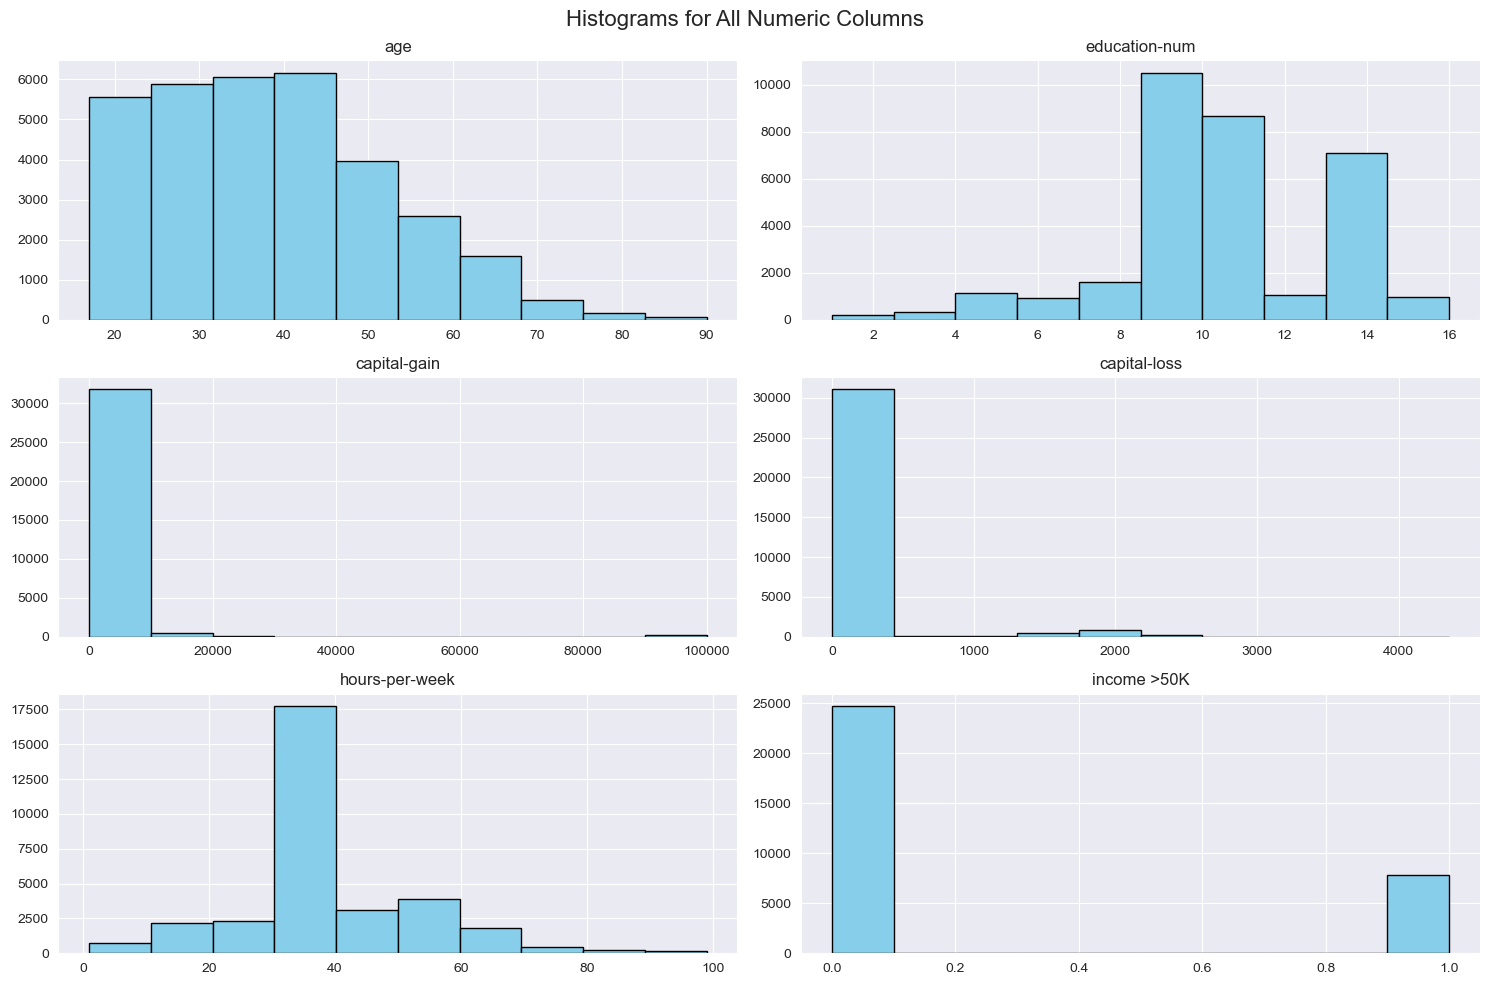

In [6]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
numeric_columns.hist(figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Histograms for All Numeric Columns', fontsize=16)
plt.tight_layout()
plt.show()

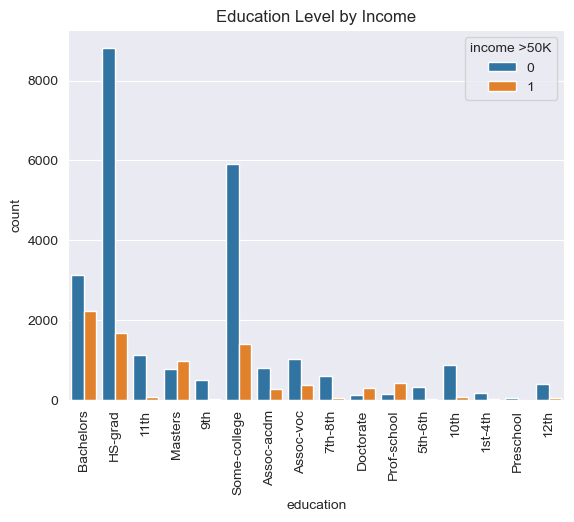

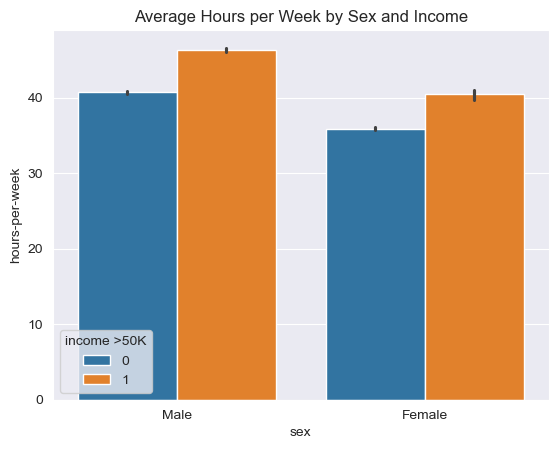

In [7]:
# Count Plot
sns.countplot(data=df, x='education', hue='income >50K')
plt.xticks(rotation=90)
plt.title('Education Level by Income')
plt.show()

# Bar Plot
sns.barplot(data=df, x='sex', y='hours-per-week', hue='income >50K')
plt.title('Average Hours per Week by Sex and Income')
plt.show()

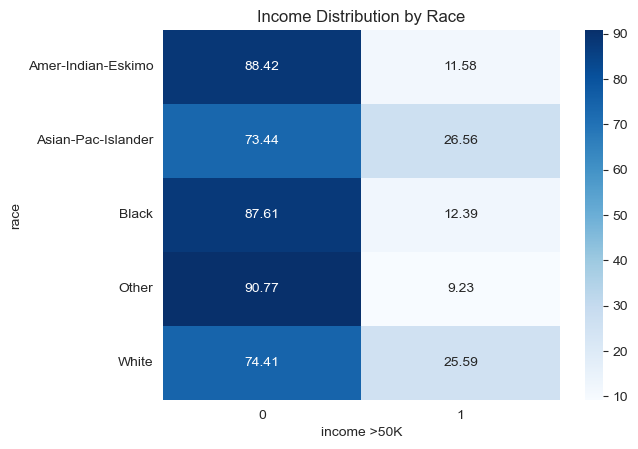

In [8]:
cross_tab = pd.crosstab(df['race'], df['income >50K'], normalize='index') * 100
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='.2f')
plt.title('Income Distribution by Race')
plt.show()


### **2. Preprocessing**

* **Description:** Encode categorical variables, clean the data, scale features if needed, and split the dataset into training and testing sets.


In [9]:
df = df[df['native-country'] == 'United-States']  # Filter for United States

In [10]:
df.isnull().sum()  # Check for missing values

age                  0
workclass         1659
education            0
education-num        0
marital-status       0
occupation        1666
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
income >50K          0
dtype: int64

In [11]:
df = df.dropna()  # Drop rows with missing values

In [12]:
X = df.drop(columns=['income >50K'])  # Features
y = df['income >50K']  # Target variable

In [13]:
y.value_counts()  # Check the distribution of the target variable

income >50K
0    20509
1     6995
Name: count, dtype: int64

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [15]:
print(x_train.isnull().sum())  # Check for missing values

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64


In [16]:
x_train.duplicated().sum()  # Check for duplicate rows

np.int64(2726)

In [17]:
duplicates = x_train[x_train.duplicated(keep=False)]  # Display duplicate rows
duplicates

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
15135,47,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
11514,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States
15108,43,Local-gov,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States
27945,36,Private,HS-grad,9,Divorced,Craft-repair,Unmarried,White,Male,0,0,40,United-States
20807,55,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16232,18,Private,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,20,United-States
6789,22,Private,Bachelors,13,Never-married,Exec-managerial,Own-child,White,Female,0,0,7,United-States
10206,19,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,20,United-States
24726,24,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Female,0,0,40,United-States


In [18]:
x_train['sex'].value_counts()

sex
Male      14852
Female     7151
Name: count, dtype: int64

In [19]:
x_train.nunique()  # Check the distribution of the target variable

age                72
workclass           7
education          16
education-num      16
marital-status      7
occupation         14
relationship        6
race                5
sex                 2
capital-gain      116
capital-loss       85
hours-per-week     93
native-country      1
dtype: int64

In [20]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

nominal_columns = ['workclass', 'marital-status', 'occupation', 'relationship', 'race']
ordinal_columns = ['education', 'sex']
numeric_columns = ['age', 'capital-gain', 'capital-loss', 'hours-per-week']
all_columns = numeric_columns + nominal_columns + ordinal_columns + ['native-country']
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first'), nominal_columns),
        ('label', OrdinalEncoder(), ordinal_columns),
        ('scaler', StandardScaler(), numeric_columns)
    ],
    remainder='drop'
)

### **3. Modeling with Logistic Regression**

* **Description:** Train a logistic regression model and predict on your data.


In [21]:
from sklearn.linear_model import LogisticRegression

logistic_model = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced', max_iter=5000, random_state=42))
])
logistic_model.fit(x_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['workclass',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race']),
                                                 ('label', OrdinalEncoder(),
                                                  ['education', 'sex']),
                                                 ('scaler', StandardScaler(),
                                                  ['age', 'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=5000,
                                    random_state=42))])


### **4. Model Evaluation**

* **Description:** Generate and visualize a confusion matrix.


=== Evaluation on Training Set ===
Accuracy (Train): 0.8331591146661819
F1 Score (Train): 0.6690109097466415
Precision (Train): 0.6751592356687898
Recall (Train): 0.6629735525375268
ROC AUC (Train): 0.7770892630122266


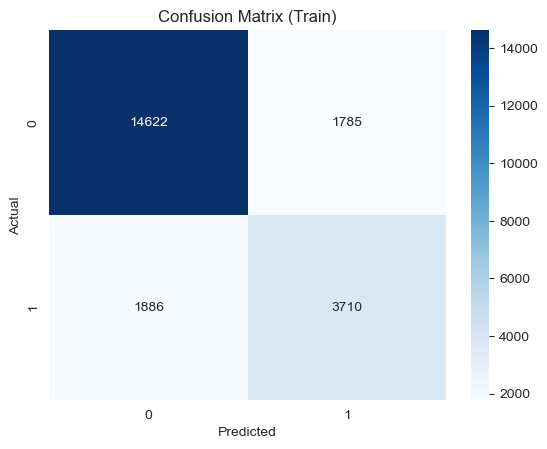

Classification Report (Train):
              precision    recall  f1-score   support

           0       0.89      0.89      0.89     16407
           1       0.68      0.66      0.67      5596

    accuracy                           0.83     22003
   macro avg       0.78      0.78      0.78     22003
weighted avg       0.83      0.83      0.83     22003



In [22]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, \
    classification_report, roc_auc_score

# === 1. تقييم النموذج على مجموعة التدريب (Train) ===
print("=== Evaluation on Training Set ===")

# تنبؤات النموذج على مجموعة التدريب
y_pred_train = logistic_model.predict_proba(x_train)[:, 1] > 0.6975224180192219

# حساب المقاييس
accuracy_train = accuracy_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
roc_auc_train = roc_auc_score(y_train, y_pred_train)

# طباعة المقاييس
print(f"Accuracy (Train): {accuracy_train}")
print(f"F1 Score (Train): {f1_train}")
print(f"Precision (Train): {precision_train}")
print(f"Recall (Train): {recall_train}")
print(f"ROC AUC (Train): {roc_auc_train}")

# إنشاء مصفوفة الارتباك
confusion_matrix_train = confusion_matrix(y_train, y_pred_train)
sns.heatmap(confusion_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Train)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# طباعة تقرير التصنيف
print("Classification Report (Train):")
print(classification_report(y_train, y_pred_train))

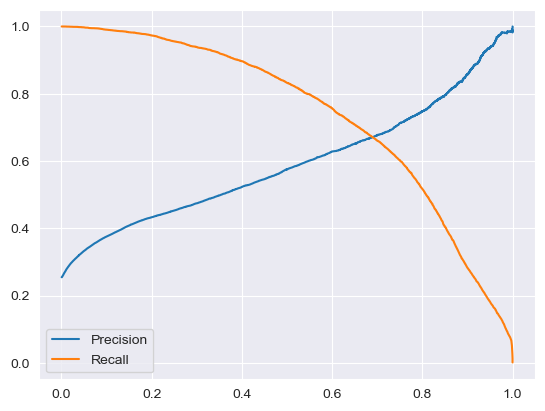

In [23]:
from sklearn.metrics import precision_recall_curve

y_prob_train = logistic_model.predict_proba(x_train)[:, 1]

# رسم منحنى Precision-Recall
precision, recall, thresholds = precision_recall_curve(y_train, y_prob_train)
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.legend()
plt.show()


In [24]:
diff = np.abs(precision[:-1] - recall[:-1])
best_threshold = thresholds[np.argmin(diff)]
print("Best Threshold where Precision intersects Recall:", best_threshold)

Best Threshold where Precision intersects Recall: 0.6898258438249136


In [25]:
# === 2. تقييم النموذج على مجموعة الاختبار (Test) ===
print("\n=== Evaluation on Test Set ===")

# تنبؤات النموذج على مجموعة الاختبار
c_y_pred_classification_test = logistic_model.predict_proba(x_test)[:, 1] > best_threshold

# حساب المقاييس
accuracy_test = accuracy_score(y_test, c_y_pred_classification_test)
f1_test = f1_score(y_test, c_y_pred_classification_test)
precision_test = precision_score(y_test, c_y_pred_classification_test)
recall_test = recall_score(y_test, c_y_pred_classification_test)
roc_auc_test = roc_auc_score(y_test, c_y_pred_classification_test)

# طباعة المقاييس
print(f"Accuracy (Test): {accuracy_test}")
print(f"F1 Score (Test): {f1_test}")
print(f"Precision (Test): {precision_test}")
print(f"Recall (Test): {recall_test}")
print(f"ROC AUC (Test): {roc_auc_test}")



=== Evaluation on Test Set ===
Accuracy (Test): 0.8291219778222142
F1 Score (Test): 0.6669029057406095
Precision (Test): 0.6612789880534083
Recall (Test): 0.6726233023588277
ROC AUC (Test): 0.7775598228030122



### **5.Conclusion**

The model has accuracy of 82.91% on the test set, with a precision of 0.66 and recall of 0.67 and F1 Score of 0.66, indicating good performance.